# 関数 save_fig：プロット結果をファイルへ保存する

In [1]:
# 2バイト文字をグラフで扱うためのパッケージインストール
!pip install japanize-matplotlib

import os
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

def save_fig(plt, file_prefix, bbox_inches='tight'):
    if file_prefix == '':
        return

    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches=bbox_inches, pad_inches = 0.2)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches=bbox_inches, pad_inches = 0.2)

import sys
from datetime import datetime
import uuid

def dmcode():
    t = datetime.now().strftime('%f%S%M%H%d%m%Y')
    buff = ['***DMCODE', t, str(uuid.uuid4())]
    print(' '.join(buff))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=ea033a5a6a2b002f5ff4ef6d95b6b24ad8fedc62856aeb6e5993e8e6c1ac750b
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


# 関数 calc_scoreとevaluate：分類性能の評価

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

def calc_score(y_true, y_pred, class_labels, name, func):
    """ある指標の値をクラスごとに計算する。
    Args:
        y_true (ndarray): 目的変数（正解）
        y_pred (ndarray): 予測値
        class_labels (list): クラスラベル（文字列）を格納したリスト
        name (str): 指標の名前
        func (sklearn.metrics): 指標を計算する関数
    """
    # 指標の計算。average=None クラスごとに値を計算する
    score = func(y_true, y_pred, average=None)

    # 書式整形してクラスごとの値を表示する
    score_str = []
    for i in range(y_true.max() + 1):
        score_str.append(f'{score[i]:.2f}')

    print('\n' + name)
    print(' '.join(class_labels))
    print(' '.join(score_str))

def evaluate(y_true, y_pred, file_prefix=''): # file_prefix to be removed
    """分類性能の評価用関数。混同行列・正解率・精度・再現率・F1値を計算し、表示する。
    Args:
        y_true (ndarray): 目的変数（正解）
        y_pred (ndarray): 予測値
    """

    # 混同行列の計算
    cm = confusion_matrix(y_true, y_pred)

    # 正解率の計算
    accuracy = accuracy_score(y_true, y_pred)
    print('正解率')
    print(f'{accuracy}')

    # 精度と再現率の表示用にクラスラベルを生成
    class_labels = []
    for i in range(y_true.max() + 1):
        class_labels.append(f'{i:4d}') # 空白を含め最低4桁で表示

    # 精度の計算。average=None クラスごとに精度を計算する
    calc_score(y_true, y_pred, class_labels, '精度', precision_score)

    # 再現率の計算。average=None クラスごとに再現率を計算する
    calc_score(y_true, y_pred, class_labels, '再現率', recall_score)

    # F1値の計算。
    calc_score(y_true, y_pred, class_labels, 'F1値', f1_score)

    # 混同行列を可視化する
    plt.figure(figsize = (6, 4))
    sns.heatmap(cm, annot=True, fmt='3d', square=True, cmap='hot', annot_kws = {'size':14})
    plt.xlabel('予測', fontsize=14)
    plt.ylabel('正解', fontsize=14)
    plt.tight_layout()
    save_fig(plt, file_prefix=file_prefix) # to be removed
    plt.show()

# 実習15.1：乳がんデータセットの読み込みと主成分分析

説明変数の個数:  30
因子寄与率:  [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
累積因子寄与率:  [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


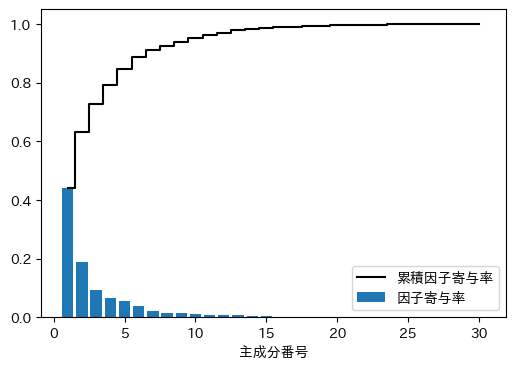

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import japanize_matplotlib

df=pd.read_csv('dm15-1.csv')
# 目的変数targetをdfから除いた列を取得
x=df.drop(['target'],axis=1).to_numpy()

# 説明変数を標準化
scaler=StandardScaler()
x=scaler.fit_transform(x)

n=x.shape[1]
print('説明変数の個数: ',n)
pca=PCA(n_components=n) # 全説明変数を使った主成分分析
z=pca.fit_transform(x) # 主成分を求めて、説明変数を主成分空間へ変換
vr=pca.explained_variance_ratio_ # 因子寄与率
print('因子寄与率: ',vr)
cum_vr=np.cumsum(vr) # 累積因子寄与率を計算
print('累積因子寄与率: ',cum_vr)

# 因子寄与率と累積因子寄与率を1つのグラフで表示する
zs=np.arange(n)+1 # グラフの横軸の値
plt.figure(figsize=(6,4))
plt.bar(zs,vr, label='因子寄与率') # 因子寄与率の棒グラフを作成
# 累積因子寄与率の階段グラフを作成
plt.step(zs,cum_vr,where='mid',label='累積因子寄与率',color='black')
plt.xlabel('主成分番号')
plt.legend()
plt.show()

# 実習15.2：次元削減と可視化

zの形状:  (569, 2)


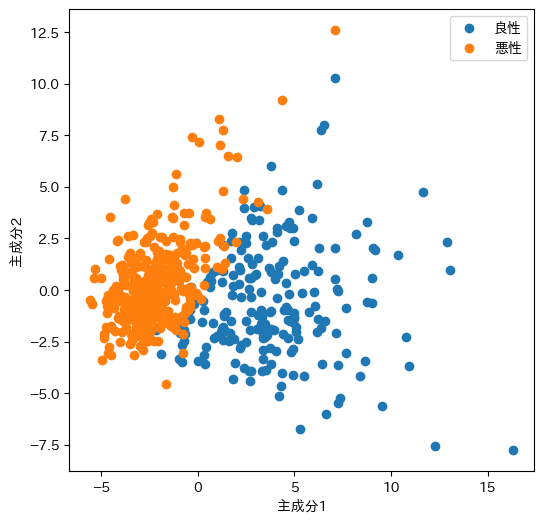

In [5]:
pca=PCA(n_components=2) # 主成分数を指定して、PCAインスタンスを生成
z=pca.fit_transform(x) # 主成分数2（2次元）の空間へ説明変数を変換＝次元削減
print('zの形状: ',z.shape)

num_classes=2 # 乳がんデータセットのクラス数
labels=['良性','悪性'] # 各クラスのラベル
y=df['target'].to_numpy() # 目的変数

# クラスごとに色分けして表示する
plt.figure(figsize=(6,6))
for c in range(num_classes):
    idx=(y==c)# クラスcの行インデックスを取得
    plt.scatter(z[idx,0], z[idx,1],label=labels[c])

plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.legend()
plt.show()

# 実習15.3：全説明変数を使っての分類

訓練データに対する予測
正解率
0.9647887323943662

精度
   0    1
0.99 0.95

再現率
   0    1
0.92 0.99

F1値
   0    1
0.95 0.97


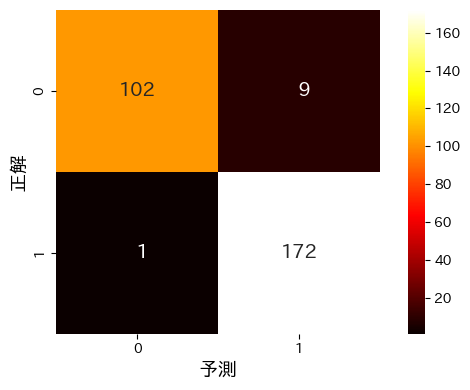

テストデータに対する予測
正解率
0.9543859649122807

精度
   0    1
0.99 0.94

再現率
   0    1
0.88 0.99

F1値
   0    1
0.93 0.97


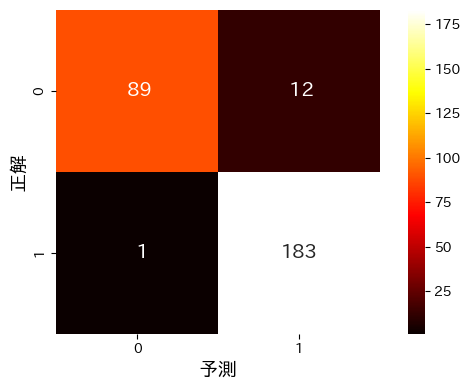

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

df=pd.read_csv('dm15-1.csv')
x=df.drop(['target'],axis=1).to_numpy() # 説明変数
y=df['target'].to_numpy() # 目的変数

# ホールドアウト検証。元のデータを訓練データとテストデータに分割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,shuffle=True,random_state=0)


# 説明変数を標準化
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# 線形サポートベクトルマシン生成
model1=SVC(kernel='linear',C=0.01)

# 訓練データで決定境界を決める
model1.fit(x_train,y_train)

print('訓練データに対する予測')
p_train=model1.predict(x_train)
evaluate(y_train,p_train)

print('テストデータに対する予測')
p_test=model1.predict(x_test)
evaluate(y_test,p_test)

# 実習15.4：2個の主成分に対する分類

変換した訓練データに対する予測
正解率
0.9366197183098591

精度
   0    1
0.97 0.92

再現率
   0    1
0.86 0.98

F1値
   0    1
0.91 0.95


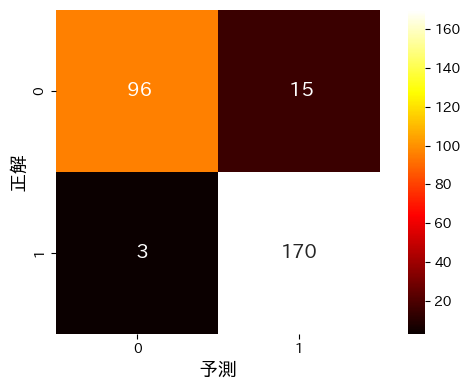

変換したテストデータに対する予測
正解率
0.9403508771929825

精度
   0    1
0.97 0.93

再現率
   0    1
0.86 0.98

F1値
   0    1
0.91 0.96


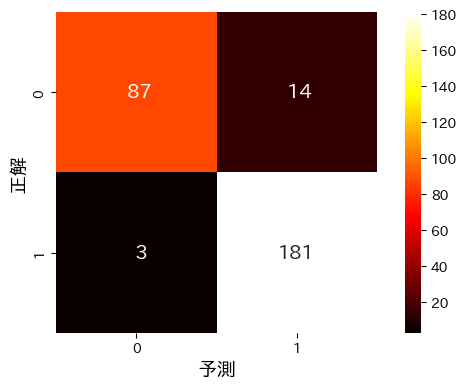

In [10]:
pca=PCA(n_components=2) # 主成分数を指定して、PCAインスタンスを生成

# 訓練データの説明変数で主成分を求め、主成分空間へ変換
z_train=pca.fit_transform(x_train)
# 訓練データで適合したPCAインスタンスを使って、
# テストデータの説明変数を主成分空間へ変換
z_test=pca.transform(x_test)

# 線形サポートベクトルマシン生成
model2=SVC(kernel='linear',C=0.01)

# 変換した訓練データで決定境界を決める
model2.fit(z_train,y_train)

print('変換した訓練データに対する予測')
p_train=model2.predict(z_train)
evaluate(y_train,p_train)

print('変換したテストデータに対する予測')
p_test=model2.predict(z_test)
evaluate(y_test,p_test)

# 実習15.5：住宅価格データセットの読み込みと主成分分析

行数:  506
列数:  13
累積因子寄与率
[0.48641508 0.61326071 0.7102981  0.77805207 0.8404329  0.88169535
 0.91275559 0.93430617 0.95446105 0.97087981 0.98501908 0.99534639
 1.        ]


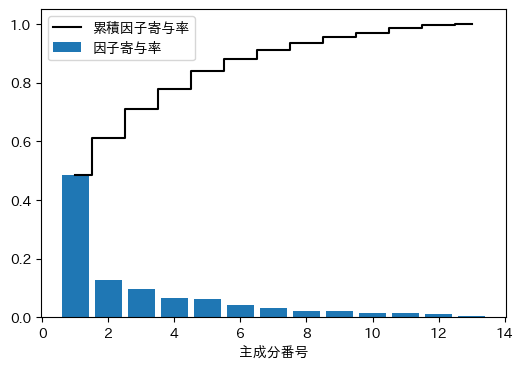

In [11]:
df=pd.read_csv('dm15-2.csv')
x=df.to_numpy()
print('行数: ',len(x))
print('列数: ',x.shape[1])

scaler=StandardScaler()
x_std=scaler.fit_transform(x)

n=x.shape[1]
pca=PCA(n_components=n)
z=pca.fit_transform(x_std)
vr=pca.explained_variance_ratio_ # 因子寄与率
cum_vr=np.cumsum(vr)
print('累積因子寄与率')
print(cum_vr)
zs=np.arange(n)+1 # グラフの横軸の1
plt.figure(figsize=(6,4))
plt.bar(zs,vr, label='因子寄与率')
plt.step(zs,cum_vr,where='mid',label='累積因子寄与率',color='black')
plt.xlabel('主成分番号')
plt.legend()
plt.show()

# 実習15.6：再構成誤差の算出

x2の形状:  (506, 13)


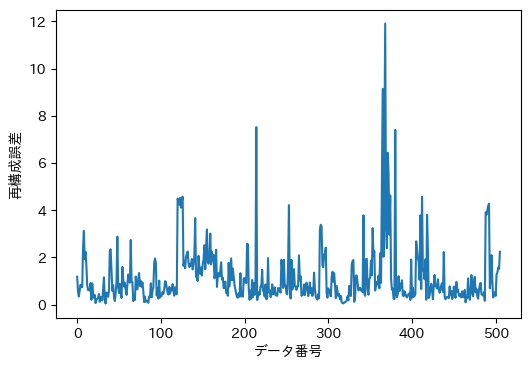

In [13]:
pca=PCA(n_components=7) # 主成分数を指定して、PCAインスタンスを生成
z=pca.fit_transform(x_std) # 主成分数7（7次元）の空間へ説明変数を変換＝次元削減
x2=pca.inverse_transform(z) # 主成分空間上の値を元の空間へ逆変換
print('x2の形状: ',x2.shape)
# 各サンプルについて再構成誤差（二乗誤差）を計算
loss=np.sum((x_std-x2)**2,axis=1)
# 各データについての再構成誤差をグラフにする
plt.figure(figsize=(6,4))
plt.plot(loss)
plt.xlabel('データ番号')
plt.ylabel('再構成誤差')
plt.show()

# 実習15.7：再構成誤差を用いた外れ値の検出

正常値の誤差:  437
外れ値の誤差:  69


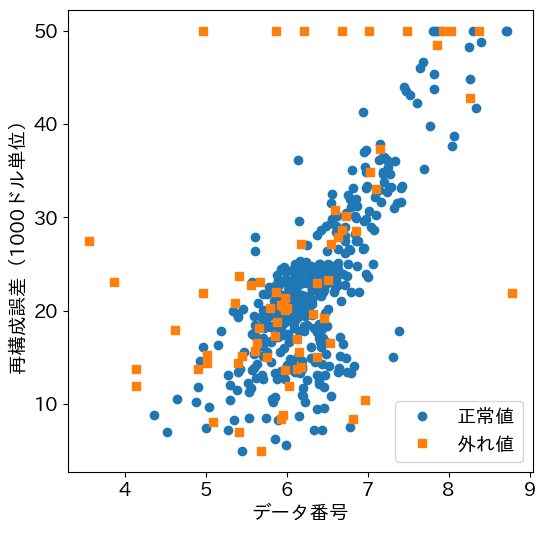

In [15]:
idx_in=(loss<2) # 再構成誤差が2未満のデータのインデックス
idx_out=(loss>=2) # 再構成誤差が2以上のデータのインデックス
print('正常値の誤差: ', np.sum(idx_in))
print('外れ値の誤差: ', np.sum(idx_out))
x=df['RM'].to_numpy() # 横軸の値に部屋数を使用
y=df['PRICE'].to_numpy() # 縦軸の値に住宅価格を使用
x_in=x[idx_in] # 部屋数の値から正常値を取得
y_in=y[idx_in] # 住宅価格の値から正常値を取得
x_out=x[idx_out] # 部屋数の値から外れ値を取得
y_out=y[idx_out] # 住宅価格の値から外れ値を取得
# 正常値と外れ値の分布をグラフで表示する
plt.figure(figsize=(6,6))
plt.plot(x_in, y_in, 'o', label='正常値')
plt.plot(x_out, y_out, 's', label='外れ値')
plt.xlabel('データ番号', fontsize=14)
plt.ylabel('再構成誤差（1000ドル単位）', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()